In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import io
import matplotlib.lines as lines

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
filename = "/content/base_jerry.xlsx"
tabla = pd.read_excel( filename)
tabla.head()

,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,100,100,65,89,65,95,65,92,58.0,86,363,99
1,100,100,100,100,73,99,76,100,80.0,100,433,100
2,100,100,72,97,64,93,67,94,69.0,95,376,100
3,100,100,74,99,70,98,71,98,56.0,83,385,100
4,100,100,76,99,77,100,70,97,69.0,95,399,100


In [ ]:
tabla = tabla[["PUNT_LECTURA_CRITICA",
               "PUNT_MATEMATICAS",
               "PERCENTIL_GLOBAL"]]
Y= tabla.PERCENTIL_GLOBAL
X= tabla.drop(['PERCENTIL_GLOBAL'], axis=1)
X.head()

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS
0,100,65
1,100,100
2,100,72
3,100,74
4,100,76


In [ ]:
print(np.linspace(10,-2,100)[:10])
lambdas = 10**np.linspace(10,-2,100)*0.5
# print(lambdas[:10])
# print(lambdas[-10:])

[10.          9.87878788  9.75757576  9.63636364  9.51515152  9.39393939
  9.27272727  9.15151515  9.03030303  8.90909091]


In [ ]:
sin_atipicos = tabla[(tabla["PERCENTIL_GLOBAL"] < 6000) & (tabla["PUNT_LECTURA_CRITICA"] < 800)]
sin_atipicos.head()

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_GLOBAL
0,100,65,99
1,100,100,100
2,100,72,100
3,100,74,100
4,100,76,100


In [ ]:
tabla1 = pd.concat([sin_atipicos["PERCENTIL_GLOBAL"], sin_atipicos["PUNT_LECTURA_CRITICA"],  sin_atipicos["PUNT_MATEMATICAS"]], axis = 1)
tabla1.head()

,PERCENTIL_GLOBAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS
0,99,100,65
1,100,100,100
2,100,100,72
3,100,100,74
4,100,100,76


In [ ]:
from sklearn.model_selection import train_test_split # Acá vamos a seleccionar los datos de entrenamiento y de prueba
x_train, x_test, y_train, y_test, z_train, z_test= train_test_split(tabla1["PERCENTIL_GLOBAL"], tabla1["PUNT_LECTURA_CRITICA"], tabla1["PUNT_MATEMATICAS"], test_size = 0.3)
 # Escogemos el 30% de los datos para prueba


In [ ]:
print(x_train, y_train, z_train)

43861     98
42467     97
284246    40
249441    28
352878    34
          ..
135084    58
185659    56
17443     87
282649    41
136214    79
Name: PERCENTIL_GLOBAL, Length: 340865, dtype: int64 43861     66
42467     66
284246    50
249441    52
352878    46
          ..
135084    58
185659    55
17443     70
282649    50
136214    58
Name: PUNT_LECTURA_CRITICA, Length: 340865, dtype: int64 43861     75
42467     72
284246    47
249441    43
352878    50
          ..
135084    45
185659    54
17443     59
282649    47
136214    61
Name: PUNT_MATEMATICAS, Length: 340865, dtype: int64


In [ ]:
yz_train = pd.concat([y_train, z_train], axis=1)
yz_train

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS
43861,66,75
42467,66,72
284246,50,47
249441,52,43
352878,46,50
...,...,...
135084,58,45
185659,55,54
17443,70,59
282649,50,47


In [ ]:
yz_test = pd.concat([y_test, z_test], axis=1)
yz_test

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS
99688,61,50
180145,56,58
421102,40,34
208875,54,42
445285,38,33
...,...,...
407632,42,53
28838,68,72
446200,38,28
401618,42,41


In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

In [ ]:
ridge = Ridge( )
coefs = []

for k in lambdas:
  ridge.set_params(alpha = k )
  ridge.fit(yz_train, x_train)
  coefs.append(ridge.coef_)


print(np.shape(coefs))
coefs[0]

(100, 2)


array([0.01721772, 0.01941022])

In [ ]:
print("El intercepto del modelo es: ", ridge.intercept_)
print("Coeficiente:", list(zip(yz_train, ridge.coef_.flatten(), )))

El intercepto del modelo es:  -91.5727335484175
Coeficiente: [('PUNT_LECTURA_CRITICA', 1.5352356293983458), ('PUNT_MATEMATICAS', 1.2063178324985384)]


In [ ]:
ridgecv = RidgeCV(alphas = lambdas, scoring = "neg_mean_squared_error")
ridgecv.fit(yz_train, x_train)
print("El valor de lambda encontrado con cross validation es: ", round(ridgecv.alpha_,3))

El valor de lambda encontrado con cross validation es:  352.74


In [ ]:
mod_ridgeCV = Ridge(alpha = ridgecv.alpha_, )
mod_ridgeCV.fit(yz_train, x_train)
print(pd.Series(mod_ridgeCV.coef_, index = X.columns))

PUNT_LECTURA_CRITICA    1.535220
PUNT_MATEMATICAS        1.206318
dtype: float64


In [ ]:
x_pred = mod_ridgeCV.predict(yz_test)
x_pred

array([62.39238957, 64.36683676, 10.8516829 , ...,  0.54333394,
       22.36635011,  9.86497838])

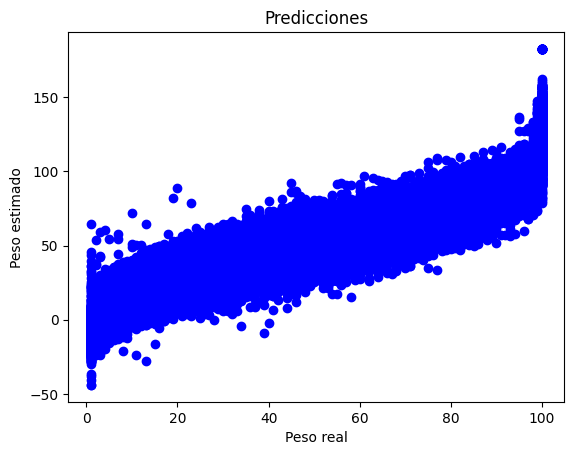

In [ ]:
plt.scatter(x_test, x_pred, color = "blue")
plt.title("Predicciones")
plt.xlabel("Peso real")
plt.ylabel("Peso estimado")
plt.show()

In [ ]:
ECMcv = round(mean_squared_error(x_test, x_pred),3)
print(ECMcv)

93.674


In [ ]:
print("ECM con lambda es:", ECMcv)

ECM con lambda es: 93.674


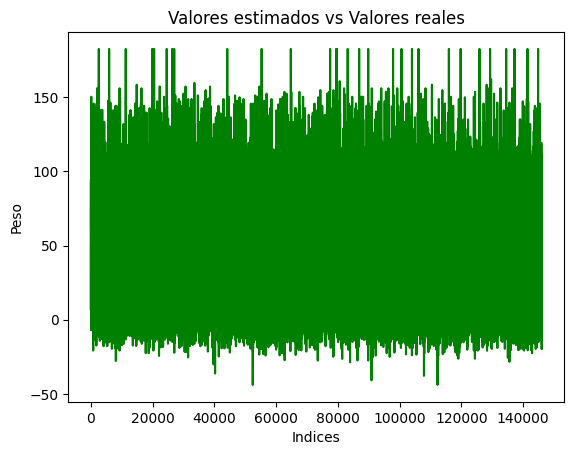

In [ ]:
eje_X = range(1,len(x_test)+1)
plt.plot(eje_X, x_test, color = "blue")
plt.plot(eje_X, x_pred, color = "green")
plt.title("Valores estimados vs Valores reales")
plt.xlabel("Indices")
plt.ylabel("Peso")
plt.show()

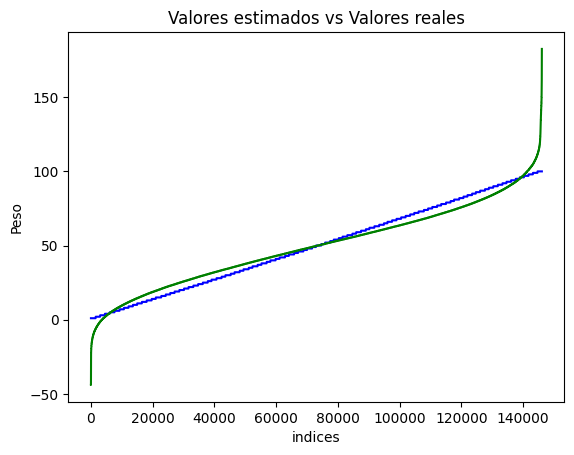

In [ ]:
eje_X = range(1, len(x_test)+1)
plt.plot(eje_X, sorted(x_test), color = "blue")
plt.plot(eje_X, sorted(x_pred), color = "green")
plt.title("Valores estimados vs Valores reales")
plt.xlabel("indices")
plt.ylabel("Peso")
plt.show()

In [ ]:
err_abs = x_test-x_pred
err_cuad = pow(err_abs, 2)
print("ECM con lambda = ", round(ridgecv.alpha_, 3), "es:", ECMcv)

ECM con lambda =  352.74 es: 93.674


In [ ]:
r_cuadrada = r2_score(x_test, x_pred)
print("R^2 = ", round(r_cuadrada,3))

n = len(yz_train)
p = len(x_train)
r_cuad_aj =1 - (((1- r_cuadrada)*(n-1))/(n-p-1))

print("n = ",n)
print("p =",p)
print("R^2 =", round(r_cuad_aj,3)) #porcentaje de variabilidad utilizamos la r^2 ajustada

R^2 =  0.888
n =  340865
p = 340865
R^2 = 38250.805


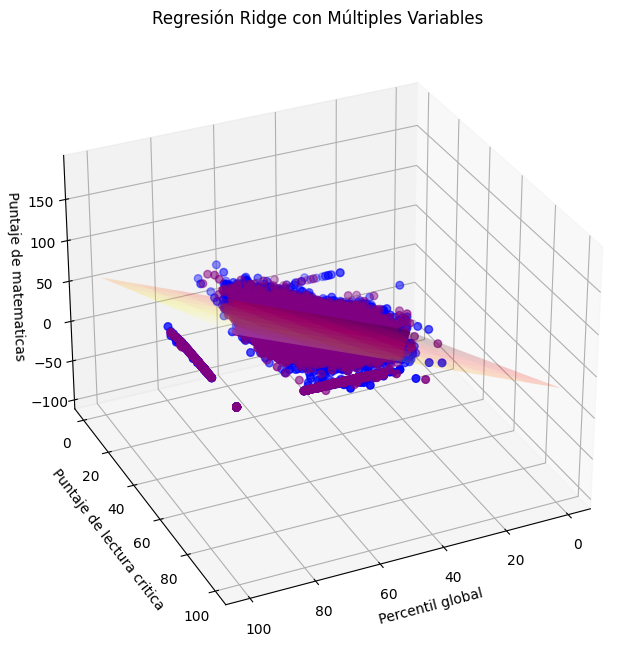

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(0, 100, num=10), np.linspace(0, 100, num=10))
n = list(zip(yz_train, ridge.coef_.flatten(), ))

nuevoX = (n[0][1] * xx)
nuevoY = (n[1][1] * yy)


x = (nuevoX + nuevoY + ridge.intercept_)
ax.plot_surface(xx, yy, x, alpha=0.2, cmap='hot')
ax.scatter(yz_train["PUNT_LECTURA_CRITICA"], yz_train["PUNT_MATEMATICAS"], x_train, c='blue',s=30)
ax.scatter(yz_test["PUNT_LECTURA_CRITICA"], yz_test["PUNT_MATEMATICAS"], x_test, c='purple',s=30)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Percentil global')
ax.set_ylabel('Puntaje de lectura critica')
ax.set_zlabel('Puntaje de matematicas')
ax.set_title('Regresión Ridge con Múltiples Variables')

plt.show()

In [ ]:
yz_test = pd.concat([y_test, z_test], axis=1)
r2 = ridge.score(yz_test, x_test)
r2

0.8877857143124892